In [ ]:
#Library import
import pyarrow as pa
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
from datetime import datetime

In [ ]:
#Read both parquet files
ONI_all = pd.read_parquet('SST_all.parquet')
WL_all = pd.read_parquet('WL_all.parquet')
display (ONI_all, WL_all)


,Year_Month,SST
0,1950-01,-1.53
1,1950-02,-1.34
2,1950-03,-1.16
3,1950-04,-1.18
4,1950-05,-1.07
...,...,...
895,2024-08,-0.11
896,2024-09,-0.21
897,2024-10,-0.26
898,2024-11,-0.37


,Year_Month,Water_Level_m
0,1965-01-01,26.323610
1,1965-02-01,26.137689
2,1965-03-01,25.762286
3,1965-04-01,25.414427
4,1965-05-01,25.200176
...,...,...
717,2024-10-01,26.456542
718,2024-11-01,26.731570
719,2024-12-01,27.022388
720,2025-01-01,26.994563


In [ ]:
ONI_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year_Month  900 non-null    object
 1   SST         900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


In [ ]:
#convert to numeric
ONI_all.rename(columns={'SST': 'ONI'}, inplace=True)
ONI_all['ONI'] = pd.to_numeric(ONI_all['ONI'])
# Strip leading/trailing spaces from 'Year_Month' column before converting to datetime
ONI_all['Year_Month'] = ONI_all['Year_Month'].str.strip()
ONI_all['Year_Month'] = pd.to_datetime(ONI_all['Year_Month'], format='%Y-%m')

In [ ]:
# Merge the two DataFrames on 'Year_Month'
WL_ONI_all= pd.merge(ONI_all, WL_all, on='Year_Month', how='inner')

# Display the merged DataFrame
display(WL_ONI_all)

,Year_Month,ONI,Water_Level_m
0,1965-01-01,-0.59,26.323610
1,1965-02-01,-0.28,26.137689
2,1965-03-01,-0.07,25.762286
3,1965-04-01,0.18,25.414427
4,1965-05-01,0.46,25.200176
...,...,...,...
715,2024-08-01,-0.11,26.031493
716,2024-09-01,-0.21,26.252932
717,2024-10-01,-0.26,26.456542
718,2024-11-01,-0.37,26.731570


In [ ]:
WL_ONI_all['El-Nino'] = WL_ONI_all['ONI'].apply(lambda x: 1 if x >= 0.5 else 0)
WL_ONI_all['La-Nina'] = WL_ONI_all['ONI'].apply(lambda x: 1 if x <= -0.5 else 0)
WL_ONI_all

,Year_Month,ONI,Water_Level_m,El-Nino,La-Nina
0,1965-01-01,-0.59,26.323610,0,1
1,1965-02-01,-0.28,26.137689,0,0
2,1965-03-01,-0.07,25.762286,0,0
3,1965-04-01,0.18,25.414427,0,0
4,1965-05-01,0.46,25.200176,0,0
...,...,...,...,...,...
715,2024-08-01,-0.11,26.031493,0,0
716,2024-09-01,-0.21,26.252932,0,0
717,2024-10-01,-0.26,26.456542,0,0
718,2024-11-01,-0.37,26.731570,0,0


In [ ]:
# Create lagged ONI columns
for i in range(1, 7):
    WL_ONI_all[f'WL_lag_{i}'] = WL_ONI_all['Water_Level_m'].shift(i)

# Display the final DataFrame
display(WL_ONI_all)

,Year_Month,ONI,Water_Level_m,El-Nino,La-Nina,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6
0,1965-01-01,-0.59,26.323610,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1965-02-01,-0.28,26.137689,0,0,26.323610,NaN,NaN,NaN,NaN,NaN
2,1965-03-01,-0.07,25.762286,0,0,26.137689,26.323610,NaN,NaN,NaN,NaN
3,1965-04-01,0.18,25.414427,0,0,25.762286,26.137689,26.323610,NaN,NaN,NaN
4,1965-05-01,0.46,25.200176,0,0,25.414427,25.762286,26.137689,26.323610,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
715,2024-08-01,-0.11,26.031493,0,0,25.561315,25.030379,24.602571,24.476050,24.541906,24.684596
716,2024-09-01,-0.21,26.252932,0,0,26.031493,25.561315,25.030379,24.602571,24.476050,24.541906
717,2024-10-01,-0.26,26.456542,0,0,26.252932,26.031493,25.561315,25.030379,24.602571,24.476050
718,2024-11-01,-0.37,26.731570,0,0,26.456542,26.252932,26.031493,25.561315,25.030379,24.602571


In [ ]:
# Create lagged ONI columns
for i in range(1, 7):
    (WL_ONI_all)[f'ONI_lag_{i}'] = (WL_ONI_all)['ONI'].shift(i)

# Display the final DataFrame
display(WL_ONI_all)

,Year_Month,ONI,Water_Level_m,El-Nino,La-Nina,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6
0,1965-01-01,-0.59,26.323610,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1965-02-01,-0.28,26.137689,0,0,26.323610,NaN,NaN,NaN,NaN,NaN,-0.59,NaN,NaN,NaN,NaN,NaN
2,1965-03-01,-0.07,25.762286,0,0,26.137689,26.323610,NaN,NaN,NaN,NaN,-0.28,-0.59,NaN,NaN,NaN,NaN
3,1965-04-01,0.18,25.414427,0,0,25.762286,26.137689,26.323610,NaN,NaN,NaN,-0.07,-0.28,-0.59,NaN,NaN,NaN
4,1965-05-01,0.46,25.200176,0,0,25.414427,25.762286,26.137689,26.323610,NaN,NaN,0.18,-0.07,-0.28,-0.59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2024-08-01,-0.11,26.031493,0,0,25.561315,25.030379,24.602571,24.476050,24.541906,24.684596,0.04,0.15,0.39,0.71,1.14,1.48
716,2024-09-01,-0.21,26.252932,0,0,26.031493,25.561315,25.030379,24.602571,24.476050,24.541906,-0.11,0.04,0.15,0.39,0.71,1.14
717,2024-10-01,-0.26,26.456542,0,0,26.252932,26.031493,25.561315,25.030379,24.602571,24.476050,-0.21,-0.11,0.04,0.15,0.39,0.71
718,2024-11-01,-0.37,26.731570,0,0,26.456542,26.252932,26.031493,25.561315,25.030379,24.602571,-0.26,-0.21,-0.11,0.04,0.15,0.39


In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['ONI', 'Water_Level_m', 'WL_lag_1', 'WL_lag_2', 'WL_lag_3', 'WL_lag_4', 'WL_lag_5', 'WL_lag_6', 'ONI_lag_1',	'ONI_lag_2',	'ONI_lag_3',	'ONI_lag_4',	'ONI_lag_5',	'ONI_lag_6']

# Calculate the correlation matrix
correlation_matrix = WL_ONI_all[columns_for_correlation].corr()

# Display the correlation matrix
display(correlation_matrix)

,ONI,Water_Level_m,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6
ONI,1.000000,-0.310744,-0.286255,-0.252327,-0.211001,-0.164688,-0.115137,-0.066171,0.973029,0.900819,0.798763,0.680911,0.554947,0.426789
Water_Level_m,-0.310744,1.000000,0.904667,0.695923,0.459147,0.245175,0.088699,0.001466,-0.324762,-0.331220,-0.329476,-0.315975,-0.289703,-0.252135
WL_lag_1,-0.286255,0.904667,1.000000,0.904519,0.695794,0.459149,0.245644,0.091049,-0.310013,-0.324466,-0.331237,-0.329624,-0.316373,-0.290476
WL_lag_2,-0.252327,0.695923,0.904519,1.000000,0.904534,0.695912,0.459625,0.247551,-0.285571,-0.309641,-0.324321,-0.331195,-0.329778,-0.316820
WL_lag_3,-0.211001,0.459147,0.695794,0.904534,1.000000,0.904573,0.696189,0.460981,-0.251827,-0.285255,-0.309462,-0.324205,-0.331202,-0.329974
WL_lag_4,-0.164688,0.245175,0.459149,0.695912,0.904573,1.000000,0.904673,0.697118,-0.210714,-0.251630,-0.285127,-0.309367,-0.324173,-0.331273
WL_lag_5,-0.115137,0.088699,0.245644,0.459625,0.696189,0.904673,1.000000,0.905143,-0.164697,-0.210718,-0.251630,-0.285126,-0.309364,-0.324177
WL_lag_6,-0.066171,0.001466,0.091049,0.247551,0.460981,0.697118,0.905143,1.000000,-0.115905,-0.165281,-0.211171,-0.252034,-0.285407,-0.309456
ONI_lag_1,0.973029,-0.324762,-0.310013,-0.285571,-0.251827,-0.210714,-0.164697,-0.115905,1.000000,0.973040,0.900850,0.798791,0.680980,0.555122
ONI_lag_2,0.900819,-0.331220,-0.324466,-0.309641,-0.285255,-0.251630,-0.210718,-0.165281,0.973040,1.000000,0.973046,0.900856,0.798825,0.681094


In [ ]:
# Filter the DataFrame for El Nino events
el_nino_data = WL_ONI_all[WL_ONI_all['El-Nino'] == 1]

# Select the columns for correlation analysis
columns_for_correlation = ['ONI', 'Water_Level_m', 'WL_lag_1', 'WL_lag_2', 'WL_lag_3', 'WL_lag_4', 'WL_lag_5', 'WL_lag_6', 'ONI_lag_1',	'ONI_lag_2',	'ONI_lag_3',	'ONI_lag_4',	'ONI_lag_5',	'ONI_lag_6']

# Calculate the correlation matrix for El Nino events
el_nino_correlation_matrix = el_nino_data[columns_for_correlation].corr()

# Display the correlation matrix for El Nino events
display(el_nino_correlation_matrix)

,ONI,Water_Level_m,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6
ONI,1.000000,-0.257834,-0.285973,-0.339864,-0.379565,-0.378028,-0.326230,-0.241363,0.912180,0.741590,0.584665,0.463284,0.367967,0.277809
Water_Level_m,-0.257834,1.000000,0.923549,0.750604,0.550907,0.369978,0.245586,0.170464,-0.279493,-0.294472,-0.300110,-0.294509,-0.274821,-0.256357
WL_lag_1,-0.285973,0.923549,1.000000,0.919880,0.739810,0.540234,0.370142,0.247622,-0.241997,-0.205080,-0.185457,-0.175542,-0.160060,-0.145766
WL_lag_2,-0.339864,0.750604,0.919880,1.000000,0.916019,0.743207,0.554874,0.396641,-0.258785,-0.180027,-0.127909,-0.099643,-0.079205,-0.062229
WL_lag_3,-0.379565,0.550907,0.739810,0.916019,1.000000,0.920471,0.756140,0.580912,-0.303508,-0.212490,-0.140845,-0.093515,-0.062762,-0.038509
WL_lag_4,-0.378028,0.369978,0.540234,0.743207,0.920471,1.000000,0.921978,0.761144,-0.336907,-0.265679,-0.198075,-0.144147,-0.106335,-0.071106
WL_lag_5,-0.326230,0.245586,0.370142,0.554874,0.756140,0.921978,1.000000,0.925139,-0.348643,-0.322411,-0.281980,-0.240274,-0.203008,-0.160428
WL_lag_6,-0.241363,0.170464,0.247622,0.396641,0.580912,0.761144,0.925139,1.000000,-0.336726,-0.363762,-0.356054,-0.336190,-0.312622,-0.279943
ONI_lag_1,0.912180,-0.279493,-0.241997,-0.258785,-0.303508,-0.336907,-0.348643,-0.336726,1.000000,0.944388,0.839623,0.733614,0.640710,0.549170
ONI_lag_2,0.741590,-0.294472,-0.205080,-0.180027,-0.212490,-0.265679,-0.322411,-0.363762,0.944388,1.000000,0.966197,0.894575,0.812669,0.725957


In [ ]:
print(len(el_nino_data))

188


In [ ]:
# Filter the DataFrame for El Nino events
la_nina_data = WL_ONI_all[WL_ONI_all['La-Nina'] == 1]

# Select the columns for correlation analysis
columns_for_correlation = ['ONI', 'Water_Level_m', 'WL_lag_1', 'WL_lag_2', 'WL_lag_3', 'WL_lag_4', 'WL_lag_5', 'WL_lag_6', 'ONI_lag_1',	'ONI_lag_2',	'ONI_lag_3',	'ONI_lag_4',	'ONI_lag_5',	'ONI_lag_6']

# Calculate the correlation matrix for El Nino events
la_nina_correlation_matrix = la_nina_data[columns_for_correlation].corr()

# Display the correlation matrix for El Nino events
display(la_nina_correlation_matrix)

,ONI,Water_Level_m,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6
ONI,1.000000,-0.245327,-0.165421,-0.046342,0.055765,0.138961,0.200451,0.252257,0.868605,0.626000,0.413140,0.258810,0.143308,0.049528
Water_Level_m,-0.245327,1.000000,0.835985,0.511673,0.225619,-0.002078,-0.192194,-0.311023,-0.241072,-0.183451,-0.138998,-0.117157,-0.113975,-0.116787
WL_lag_1,-0.165421,0.835985,1.000000,0.854649,0.595302,0.348665,0.117700,-0.069556,-0.314019,-0.357738,-0.352271,-0.337471,-0.327347,-0.320284
WL_lag_2,-0.046342,0.511673,0.854649,1.000000,0.889349,0.677415,0.441145,0.223178,-0.297399,-0.435279,-0.489287,-0.501391,-0.500514,-0.493099
WL_lag_3,0.055765,0.225619,0.595302,0.889349,1.000000,0.904377,0.703049,0.486444,-0.217538,-0.403988,-0.508233,-0.558075,-0.578742,-0.583709
WL_lag_4,0.138961,-0.002078,0.348665,0.677415,0.904377,1.000000,0.907879,0.719111,-0.108610,-0.300722,-0.432387,-0.514541,-0.561423,-0.585355
WL_lag_5,0.200451,-0.192194,0.117700,0.441145,0.703049,0.907879,1.000000,0.914096,0.004591,-0.166688,-0.300533,-0.399936,-0.469080,-0.512907
WL_lag_6,0.252257,-0.311023,-0.069556,0.223178,0.486444,0.719111,0.914096,1.000000,0.122338,-0.023992,-0.152601,-0.256828,-0.339520,-0.399076
ONI_lag_1,0.868605,-0.241072,-0.314019,-0.297399,-0.217538,-0.108610,0.004591,0.122338,1.000000,0.913367,0.747095,0.585074,0.454372,0.347565
ONI_lag_2,0.626000,-0.183451,-0.357738,-0.435279,-0.403988,-0.300722,-0.166688,-0.023992,0.913367,1.000000,0.941052,0.820244,0.693536,0.583394


In [ ]:
print(len(la_nina_data))

207


In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['El-Nino', 'Water_Level_m', 'WL_lag_1', 'WL_lag_2', 'WL_lag_3', 'WL_lag_4', 'WL_lag_5', 'WL_lag_6', 'ONI_lag_1',	'ONI_lag_2',	'ONI_lag_3',	'ONI_lag_4',	'ONI_lag_5',	'ONI_lag_6']

# Calculate the correlation matrix
correlation_matrix = WL_ONI_all[columns_for_correlation].corr()

# Display the correlation matrix
display(correlation_matrix)

,El-Nino,Water_Level_m,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6
El-Nino,1.000000,-0.145492,-0.136473,-0.140549,-0.151346,-0.163342,-0.171586,-0.159221,0.745434,0.690093,0.608762,0.512631,0.410963,0.314751
Water_Level_m,-0.145492,1.000000,0.904667,0.695923,0.459147,0.245175,0.088699,0.001466,-0.324762,-0.331220,-0.329476,-0.315975,-0.289703,-0.252135
WL_lag_1,-0.136473,0.904667,1.000000,0.904519,0.695794,0.459149,0.245644,0.091049,-0.310013,-0.324466,-0.331237,-0.329624,-0.316373,-0.290476
WL_lag_2,-0.140549,0.695923,0.904519,1.000000,0.904534,0.695912,0.459625,0.247551,-0.285571,-0.309641,-0.324321,-0.331195,-0.329778,-0.316820
WL_lag_3,-0.151346,0.459147,0.695794,0.904534,1.000000,0.904573,0.696189,0.460981,-0.251827,-0.285255,-0.309462,-0.324205,-0.331202,-0.329974
WL_lag_4,-0.163342,0.245175,0.459149,0.695912,0.904573,1.000000,0.904673,0.697118,-0.210714,-0.251630,-0.285127,-0.309367,-0.324173,-0.331273
WL_lag_5,-0.171586,0.088699,0.245644,0.459625,0.696189,0.904673,1.000000,0.905143,-0.164697,-0.210718,-0.251630,-0.285126,-0.309364,-0.324177
WL_lag_6,-0.159221,0.001466,0.091049,0.247551,0.460981,0.697118,0.905143,1.000000,-0.115905,-0.165281,-0.211171,-0.252034,-0.285407,-0.309456
ONI_lag_1,0.745434,-0.324762,-0.310013,-0.285571,-0.251827,-0.210714,-0.164697,-0.115905,1.000000,0.973040,0.900850,0.798791,0.680980,0.555122
ONI_lag_2,0.690093,-0.331220,-0.324466,-0.309641,-0.285255,-0.251630,-0.210718,-0.165281,0.973040,1.000000,0.973046,0.900856,0.798825,0.681094


In [ ]:
#read Bulk_PA 1
Bulk_PA= pd.read_parquet('Bulk_PA_Clean.parquet')
display(Bulk_PA)

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,...,load_Australia,disch_NE_America,disch_NW_America,disch_SE_America,disch_SW_America,disch_E_Asia,disch_Europe_N_Africa,disch_Australia,OD_region,region_pairs
0,West Coast South America,Chile,Puerto Patache,11.8,2019-01-01 17:56:12,2019-01-03,East Coast U.S,USA,New York,6.5,...,0,1,0,0,0,0,0,0,SW_America_to_NE_America,NE_America-SW_America
1,North West Africa,Morocco,Casablanca,12.2,2019-01-01 06:07:01,2019-01-03,West Coast Central America,Mexico,Lazaro Cardenas,6.9,...,0,0,1,0,0,0,0,0,Europe_N_Africa_to_NW_America,Europe_N_Africa-NW_America
2,West Mediterranean,Spain,Barcelona,10.9,2019-01-01 19:39:22,2019-01-04,West Coast Central America,Costa Rica,Caldera (Costa Rica),6.3,...,0,0,1,0,0,0,0,0,Europe_N_Africa_to_NW_America,Europe_N_Africa-NW_America
3,North Coast South America,Colombia,Puerto Drummond,11.5,2019-01-04 05:08:37,2019-01-05,West Coast Central America,Guatemala,Puerto Quetzal,5.5,...,0,0,1,0,0,0,0,0,SE_America_to_NW_America,NW_America-SE_America
4,West Coast South America,Chile,Puerto Patache,10.4,2019-01-03 21:48:40,2019-01-05,East Coast U.S,USA,Claymont,6.0,...,0,1,0,0,0,0,0,0,SW_America_to_NE_America,NE_America-SW_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,USG,USA,Houston,11.8,2024-12-05 16:09:28,2024-12-06,West Coast Central America,Mexico,Manzanillo (Mex),7.0,...,0,0,1,0,0,0,0,0,NE_America_to_NW_America,NE_America-NW_America
10316,North Coast South America,Colombia,Puerto Drummond,11.5,2024-12-06 00:15:57,2024-12-07,West Coast Central America,Guatemala,Puerto Quetzal,6.5,...,0,0,1,0,0,0,0,0,SE_America_to_NW_America,NW_America-SE_America
10317,West Coast South America,Chile,Patillos,11.6,2024-12-05 08:37:51,2024-12-07,East Coast U.S,USA,Newark,6.3,...,0,1,0,0,0,0,0,0,SW_America_to_NE_America,NE_America-SW_America
10318,USG,USA,Ama,10.2,2024-12-09 12:59:37,2024-12-11,West Coast Central America,El Salvador,Acajutla,5.4,...,0,0,1,0,0,0,0,0,NE_America_to_NW_America,NE_America-NW_America


In [ ]:
# Group by 'proxy_transit_month' and count transits
Bulk_PA['proxy_transit_month'] = Bulk_PA['load_end_date'].dt.to_period('M')
transit_counts = Bulk_PA.groupby('proxy_transit_month').size().reset_index(name='number_transits')

# Display the new DataFrame
display(transit_counts)

,proxy_transit_month,number_transits
0,2019-01,106
1,2019-02,106
2,2019-03,115
3,2019-04,152
4,2019-05,135
...,...,...
67,2024-08,134
68,2024-09,128
69,2024-10,158
70,2024-11,80


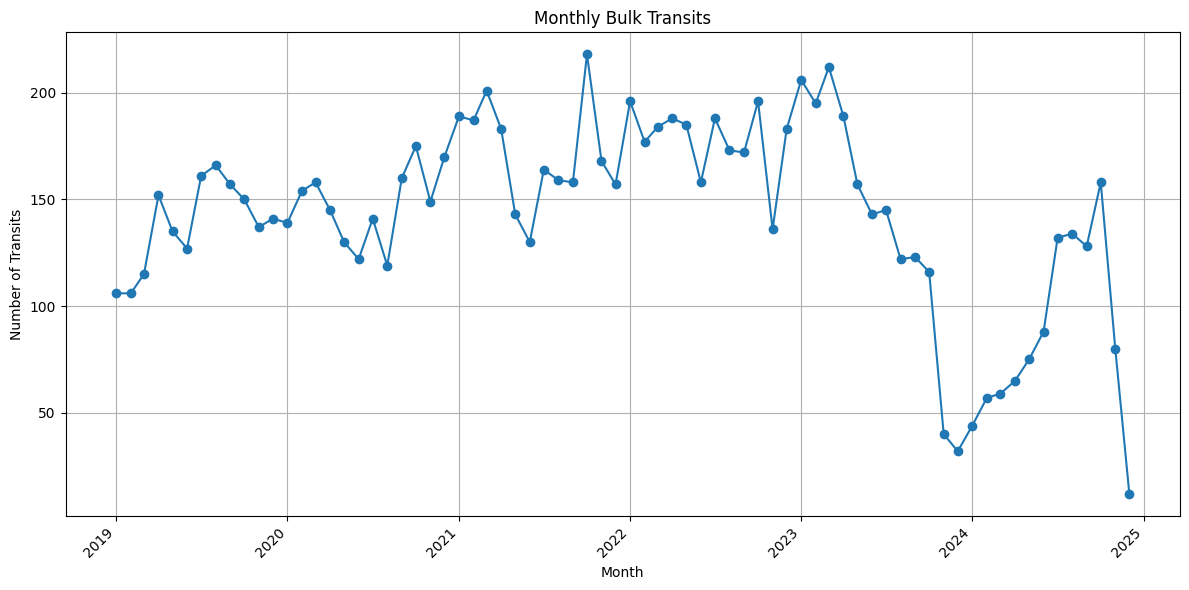

In [ ]:
# Assuming Bulk_PA is already defined

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(transit_counts['proxy_transit_month'].dt.to_timestamp(), transit_counts['number_transits'], marker='o')  # Convert to timestamp for plotting
plt.title('Monthly Bulk Transits')
plt.xlabel('Month')
plt.ylabel('Number of Transits')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# WL_ONI_all filter to filter dates from 2019-01-01 to 2024-12-01
WL_ONI_19_24 = WL_ONI_all[(WL_ONI_all['Year_Month'] >= '2019-01-01') & (WL_ONI_all['Year_Month'] <= '2025-01-01')].reset_index(drop=True)
WL_ONI_19_24

,Year_Month,ONI,Water_Level_m,El-Nino,La-Nina,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6
0,2019-01-01,0.75,26.188514,1,0,26.786906,26.810513,26.664789,26.320699,26.401284,26.411805,0.81,0.90,0.76,0.49,0.23,0.09
1,2019-02-01,0.72,25.857926,1,0,26.188514,26.786906,26.810513,26.664789,26.320699,26.401284,0.75,0.81,0.90,0.76,0.49,0.23
2,2019-03-01,0.71,25.290731,1,0,25.857926,26.188514,26.786906,26.810513,26.664789,26.320699,0.72,0.75,0.81,0.90,0.76,0.49
3,2019-04-01,0.66,24.721515,1,0,25.290731,25.857926,26.188514,26.786906,26.810513,26.664789,0.71,0.72,0.75,0.81,0.90,0.76
4,2019-05-01,0.54,24.407302,1,0,24.721515,25.290731,25.857926,26.188514,26.786906,26.810513,0.66,0.71,0.72,0.75,0.81,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024-08-01,-0.11,26.031493,0,0,25.561315,25.030379,24.602571,24.476050,24.541906,24.684596,0.04,0.15,0.39,0.71,1.14,1.48
68,2024-09-01,-0.21,26.252932,0,0,26.031493,25.561315,25.030379,24.602571,24.476050,24.541906,-0.11,0.04,0.15,0.39,0.71,1.14
69,2024-10-01,-0.26,26.456542,0,0,26.252932,26.031493,25.561315,25.030379,24.602571,24.476050,-0.21,-0.11,0.04,0.15,0.39,0.71
70,2024-11-01,-0.37,26.731570,0,0,26.456542,26.252932,26.031493,25.561315,25.030379,24.602571,-0.26,-0.21,-0.11,0.04,0.15,0.39


In [ ]:
# Merge WL_ONI_19_24 and transit_counts
WL_ONI_19_24['Year_Month'] = WL_ONI_19_24['Year_Month'].dt.to_period('M')
WL_ONI_19_24_PA = pd.merge(WL_ONI_19_24, transit_counts, left_on='Year_Month', right_on='proxy_transit_month', how='left')
WL_ONI_19_24_PA.drop(columns=['proxy_transit_month'], inplace=True)
WL_ONI_19_24_PA

,Year_Month,ONI,Water_Level_m,El-Nino,La-Nina,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6,number_transits
0,2019-01,0.75,26.188514,1,0,26.786906,26.810513,26.664789,26.320699,26.401284,26.411805,0.81,0.90,0.76,0.49,0.23,0.09,106
1,2019-02,0.72,25.857926,1,0,26.188514,26.786906,26.810513,26.664789,26.320699,26.401284,0.75,0.81,0.90,0.76,0.49,0.23,106
2,2019-03,0.71,25.290731,1,0,25.857926,26.188514,26.786906,26.810513,26.664789,26.320699,0.72,0.75,0.81,0.90,0.76,0.49,115
3,2019-04,0.66,24.721515,1,0,25.290731,25.857926,26.188514,26.786906,26.810513,26.664789,0.71,0.72,0.75,0.81,0.90,0.76,152
4,2019-05,0.54,24.407302,1,0,24.721515,25.290731,25.857926,26.188514,26.786906,26.810513,0.66,0.71,0.72,0.75,0.81,0.90,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024-08,-0.11,26.031493,0,0,25.561315,25.030379,24.602571,24.476050,24.541906,24.684596,0.04,0.15,0.39,0.71,1.14,1.48,134
68,2024-09,-0.21,26.252932,0,0,26.031493,25.561315,25.030379,24.602571,24.476050,24.541906,-0.11,0.04,0.15,0.39,0.71,1.14,128
69,2024-10,-0.26,26.456542,0,0,26.252932,26.031493,25.561315,25.030379,24.602571,24.476050,-0.21,-0.11,0.04,0.15,0.39,0.71,158
70,2024-11,-0.37,26.731570,0,0,26.456542,26.252932,26.031493,25.561315,25.030379,24.602571,-0.26,-0.21,-0.11,0.04,0.15,0.39,80


In [ ]:
WL_ONI_19_24_PA

,Year_Month,ONI,Water_Level_m,El-Nino,La-Nina,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6,number_transits
0,2019-01,0.75,26.188514,1,0,26.786906,26.810513,26.664789,26.320699,26.401284,26.411805,0.81,0.90,0.76,0.49,0.23,0.09,106
1,2019-02,0.72,25.857926,1,0,26.188514,26.786906,26.810513,26.664789,26.320699,26.401284,0.75,0.81,0.90,0.76,0.49,0.23,106
2,2019-03,0.71,25.290731,1,0,25.857926,26.188514,26.786906,26.810513,26.664789,26.320699,0.72,0.75,0.81,0.90,0.76,0.49,115
3,2019-04,0.66,24.721515,1,0,25.290731,25.857926,26.188514,26.786906,26.810513,26.664789,0.71,0.72,0.75,0.81,0.90,0.76,152
4,2019-05,0.54,24.407302,1,0,24.721515,25.290731,25.857926,26.188514,26.786906,26.810513,0.66,0.71,0.72,0.75,0.81,0.90,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024-08,-0.11,26.031493,0,0,25.561315,25.030379,24.602571,24.476050,24.541906,24.684596,0.04,0.15,0.39,0.71,1.14,1.48,134
68,2024-09,-0.21,26.252932,0,0,26.031493,25.561315,25.030379,24.602571,24.476050,24.541906,-0.11,0.04,0.15,0.39,0.71,1.14,128
69,2024-10,-0.26,26.456542,0,0,26.252932,26.031493,25.561315,25.030379,24.602571,24.476050,-0.21,-0.11,0.04,0.15,0.39,0.71,158
70,2024-11,-0.37,26.731570,0,0,26.456542,26.252932,26.031493,25.561315,25.030379,24.602571,-0.26,-0.21,-0.11,0.04,0.15,0.39,80


In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['number_transits','ONI','El-Nino', 'Water_Level_m', 'WL_lag_1', 'WL_lag_2', 'WL_lag_3', 'WL_lag_4', 'WL_lag_5', 'WL_lag_6', 'ONI_lag_1',	'ONI_lag_2',	'ONI_lag_3',	'ONI_lag_4',	'ONI_lag_5',	'ONI_lag_6']

# Calculate the correlation matrix
correlation_matrix = WL_ONI_19_24_PA[columns_for_correlation].corr()

# Display the correlation matrix
display(correlation_matrix)

,number_transits,ONI,El-Nino,Water_Level_m,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6
number_transits,1.000000,-0.658503,-0.531198,0.406603,0.491164,0.539552,0.548814,0.548823,0.544092,0.536037,-0.728423,-0.765654,-0.774630,-0.757470,-0.708111,-0.638513
ONI,-0.658503,1.000000,0.797181,-0.818070,-0.770605,-0.701664,-0.619236,-0.527760,-0.419545,-0.304590,0.979319,0.923152,0.841198,0.739814,0.623674,0.500542
El-Nino,-0.531198,0.797181,1.000000,-0.550743,-0.484007,-0.400666,-0.331811,-0.286104,-0.241383,-0.188458,0.776285,0.718413,0.634223,0.535392,0.427271,0.315581
Water_Level_m,0.406603,-0.818070,-0.550743,1.000000,0.942304,0.804798,0.633006,0.458646,0.301234,0.174004,-0.814209,-0.786525,-0.737989,-0.670030,-0.587813,-0.496229
WL_lag_1,0.491164,-0.770605,-0.484007,0.942304,1.000000,0.942831,0.807192,0.634742,0.465359,0.319097,-0.788354,-0.784782,-0.764502,-0.725147,-0.665838,-0.590039
WL_lag_2,0.539552,-0.701664,-0.400666,0.804798,0.942831,1.000000,0.943616,0.807547,0.639618,0.479849,-0.737708,-0.754946,-0.758301,-0.747331,-0.716691,-0.663625
WL_lag_3,0.548814,-0.619236,-0.331811,0.633006,0.807192,0.943616,1.000000,0.943150,0.809920,0.649306,-0.672788,-0.707734,-0.730692,-0.742192,-0.738680,-0.713154
WL_lag_4,0.548823,-0.527760,-0.286104,0.458646,0.634742,0.807547,0.943150,1.000000,0.943807,0.815349,-0.599949,-0.652440,-0.691547,-0.720536,-0.737371,-0.737420
WL_lag_5,0.544092,-0.419545,-0.241383,0.301234,0.465359,0.639618,0.809920,0.943807,1.000000,0.946319,-0.508221,-0.578543,-0.634613,-0.679641,-0.713780,-0.733694
WL_lag_6,0.536037,-0.304590,-0.188458,0.174004,0.319097,0.479849,0.649306,0.815349,0.946319,1.000000,-0.404593,-0.490179,-0.562823,-0.624078,-0.673244,-0.709068


# **EL-Nino indicator**

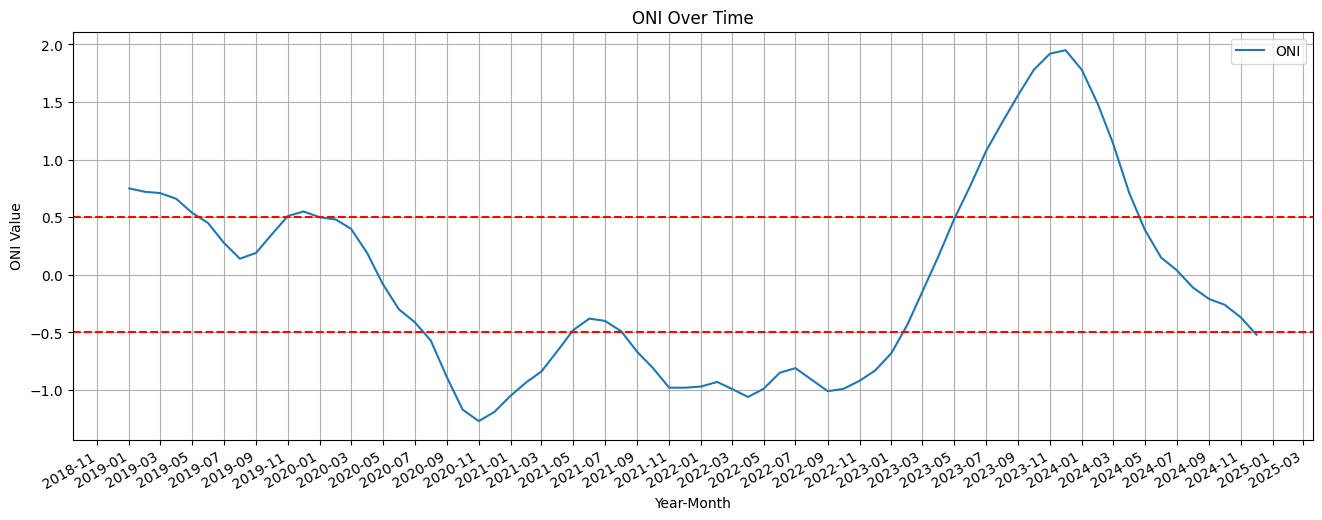

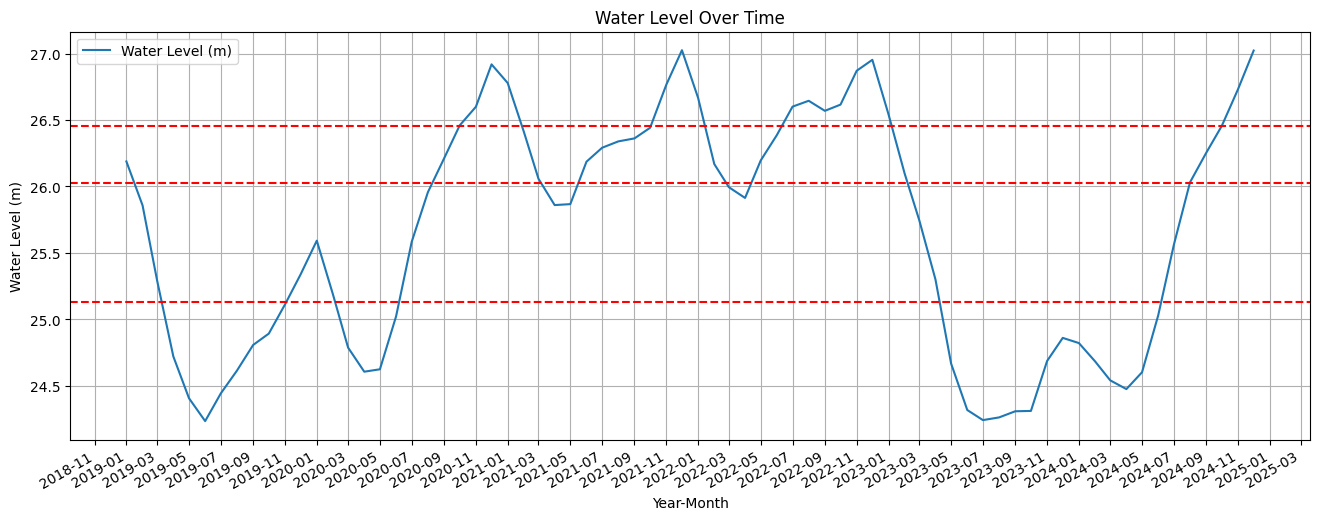

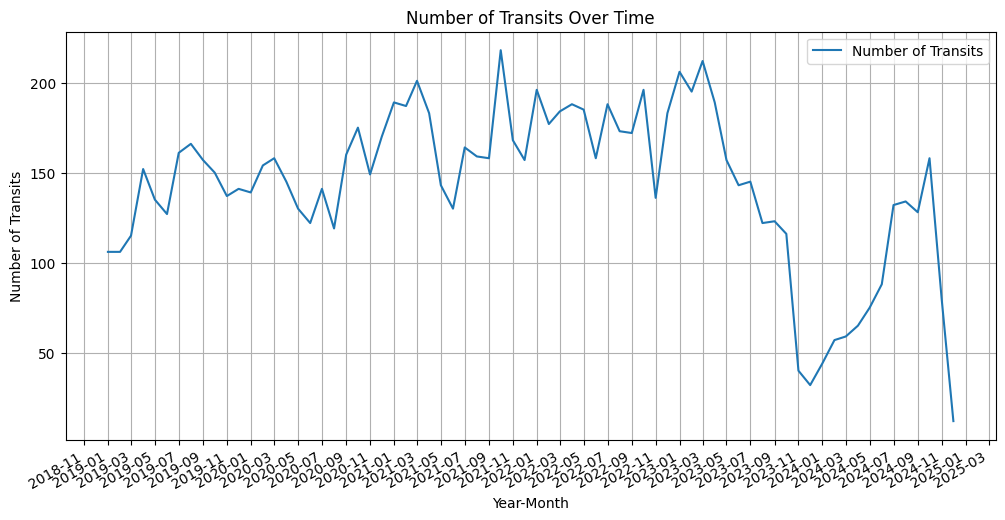

In [ ]:
import matplotlib.dates as mdates
# Crete a side by side view of ONI and water level change
# Plot ONI
WL_ONI_14_24 = WL_ONI_all[WL_ONI_all['Year_Month']>= '2019-01-01']
plt.figure(figsize=(16, 6))
plt.plot(WL_ONI_14_24['Year_Month'],
         WL_ONI_14_24['ONI'], label='ONI')
plt.title('ONI Over Time')
plt.xlabel('Year-Month')
plt.ylabel('ONI Value')
plt.legend()
plt.grid(True)

# Add horizontal lines for ONI
plt.axhline(y=0.5, color='red', linestyle='--', label='ONI = 0.5')
plt.axhline(y=-0.5, color='red', linestyle='--', label='ONI = -0.5')

# Format x-axis to show months and years
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()


# Plot Water_Level_m
plt.figure(figsize=(16, 6))
plt.plot(WL_ONI_14_24['Year_Month'], WL_ONI_14_24['Water_Level_m'], label='Water Level (m)')
plt.title('Water Level Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid(True)

# Calculate Q1, Q2, Q3 for Water Level from 2019-01 to 2023-06
# Filter data for the specified date range
filtered_data = WL_ONI_14_24[(WL_ONI_14_24['Year_Month'] >= '2019-01-01') & (WL_ONI_14_24['Year_Month'] <= '2023-06-01')]

# Calculate quartiles
Q1 = np.quantile(filtered_data['Water_Level_m'], 0.25)
Q2 = np.quantile(filtered_data['Water_Level_m'], 0.50)
Q3 = np.quantile(filtered_data['Water_Level_m'], 0.75)

# Add horizontal lines for Water Level quartiles
plt.axhline(y=Q1, color='red', linestyle='--', label='Q1')
plt.axhline(y=Q2, color='red', linestyle='--', label='Q2 (Median)')
plt.axhline(y=Q3, color='red', linestyle='--', label='Q3')

# Format x-axis to show months and years
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.show()

# Plot of number of transits per month
plt.figure(figsize=(16, 6))
plt.plot(WL_ONI_19_24_PA['Year_Month'].dt.to_timestamp(), WL_ONI_19_24_PA['number_transits'], label='Number of Transits')
plt.title('Number of Transits Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transits')
plt.legend()
plt.grid(True)

# Format x-axis to show months and years
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
WL_ONI_19_24_PA


,Year_Month,ONI,Water_Level_m,El-Nino,La-Nina,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6,number_transits
0,2019-01,0.75,26.188514,1,0,26.786906,26.810513,26.664789,26.320699,26.401284,26.411805,0.81,0.90,0.76,0.49,0.23,0.09,106
1,2019-02,0.72,25.857926,1,0,26.188514,26.786906,26.810513,26.664789,26.320699,26.401284,0.75,0.81,0.90,0.76,0.49,0.23,106
2,2019-03,0.71,25.290731,1,0,25.857926,26.188514,26.786906,26.810513,26.664789,26.320699,0.72,0.75,0.81,0.90,0.76,0.49,115
3,2019-04,0.66,24.721515,1,0,25.290731,25.857926,26.188514,26.786906,26.810513,26.664789,0.71,0.72,0.75,0.81,0.90,0.76,152
4,2019-05,0.54,24.407302,1,0,24.721515,25.290731,25.857926,26.188514,26.786906,26.810513,0.66,0.71,0.72,0.75,0.81,0.90,135
5,2019-06,0.45,24.235156,0,0,24.407302,24.721515,25.290731,25.857926,26.188514,26.786906,0.54,0.66,0.71,0.72,0.75,0.81,127
6,2019-07,0.28,24.443682,0,0,24.235156,24.407302,24.721515,25.290731,25.857926,26.188514,0.45,0.54,0.66,0.71,0.72,0.75,161
7,2019-08,0.14,24.615353,0,0,24.443682,24.235156,24.407302,24.721515,25.290731,25.857926,0.28,0.45,0.54,0.66,0.71,0.72,166
8,2019-09,0.19,24.807977,0,0,24.615353,24.443682,24.235156,24.407302,24.721515,25.290731,0.14,0.28,0.45,0.54,0.66,0.71,157
9,2019-10,0.35,24.893409,0,0,24.807977,24.615353,24.443682,24.235156,24.407302,24.721515,0.19,0.14,0.28,0.45,0.54,0.66,150


In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['ONI','El-Nino', 'Water_Level_m', 'WL_lag_1', 'WL_lag_2', 'WL_lag_3', 'WL_lag_4', 'WL_lag_5', 'WL_lag_6', 'ONI_lag_1',	'ONI_lag_2',	'ONI_lag_3',	'ONI_lag_4',	'ONI_lag_5',	'ONI_lag_6']

# Calculate the correlation matrix
correlation_matrix = WL_ONI_14_24[columns_for_correlation].corr()

# Display the correlation matrix
display(correlation_matrix)

,ONI,El-Nino,Water_Level_m,WL_lag_1,WL_lag_2,WL_lag_3,WL_lag_4,WL_lag_5,WL_lag_6,ONI_lag_1,ONI_lag_2,ONI_lag_3,ONI_lag_4,ONI_lag_5,ONI_lag_6
ONI,1.000000,0.797181,-0.818070,-0.770605,-0.701664,-0.619236,-0.527760,-0.419545,-0.304590,0.979319,0.923152,0.841198,0.739814,0.623674,0.500542
El-Nino,0.797181,1.000000,-0.550743,-0.484007,-0.400666,-0.331811,-0.286104,-0.241383,-0.188458,0.776285,0.718413,0.634223,0.535392,0.427271,0.315581
Water_Level_m,-0.818070,-0.550743,1.000000,0.942304,0.804798,0.633006,0.458646,0.301234,0.174004,-0.814209,-0.786525,-0.737989,-0.670030,-0.587813,-0.496229
WL_lag_1,-0.770605,-0.484007,0.942304,1.000000,0.942831,0.807192,0.634742,0.465359,0.319097,-0.788354,-0.784782,-0.764502,-0.725147,-0.665838,-0.590039
WL_lag_2,-0.701664,-0.400666,0.804798,0.942831,1.000000,0.943616,0.807547,0.639618,0.479849,-0.737708,-0.754946,-0.758301,-0.747331,-0.716691,-0.663625
WL_lag_3,-0.619236,-0.331811,0.633006,0.807192,0.943616,1.000000,0.943150,0.809920,0.649306,-0.672788,-0.707734,-0.730692,-0.742192,-0.738680,-0.713154
WL_lag_4,-0.527760,-0.286104,0.458646,0.634742,0.807547,0.943150,1.000000,0.943807,0.815349,-0.599949,-0.652440,-0.691547,-0.720536,-0.737371,-0.737420
WL_lag_5,-0.419545,-0.241383,0.301234,0.465359,0.639618,0.809920,0.943807,1.000000,0.946319,-0.508221,-0.578543,-0.634613,-0.679641,-0.713780,-0.733694
WL_lag_6,-0.304590,-0.188458,0.174004,0.319097,0.479849,0.649306,0.815349,0.946319,1.000000,-0.404593,-0.490179,-0.562823,-0.624078,-0.673244,-0.709068
ONI_lag_1,0.979319,0.776285,-0.814209,-0.788354,-0.737708,-0.672788,-0.599949,-0.508221,-0.404593,1.000000,0.979696,0.924333,0.841639,0.738580,0.622245


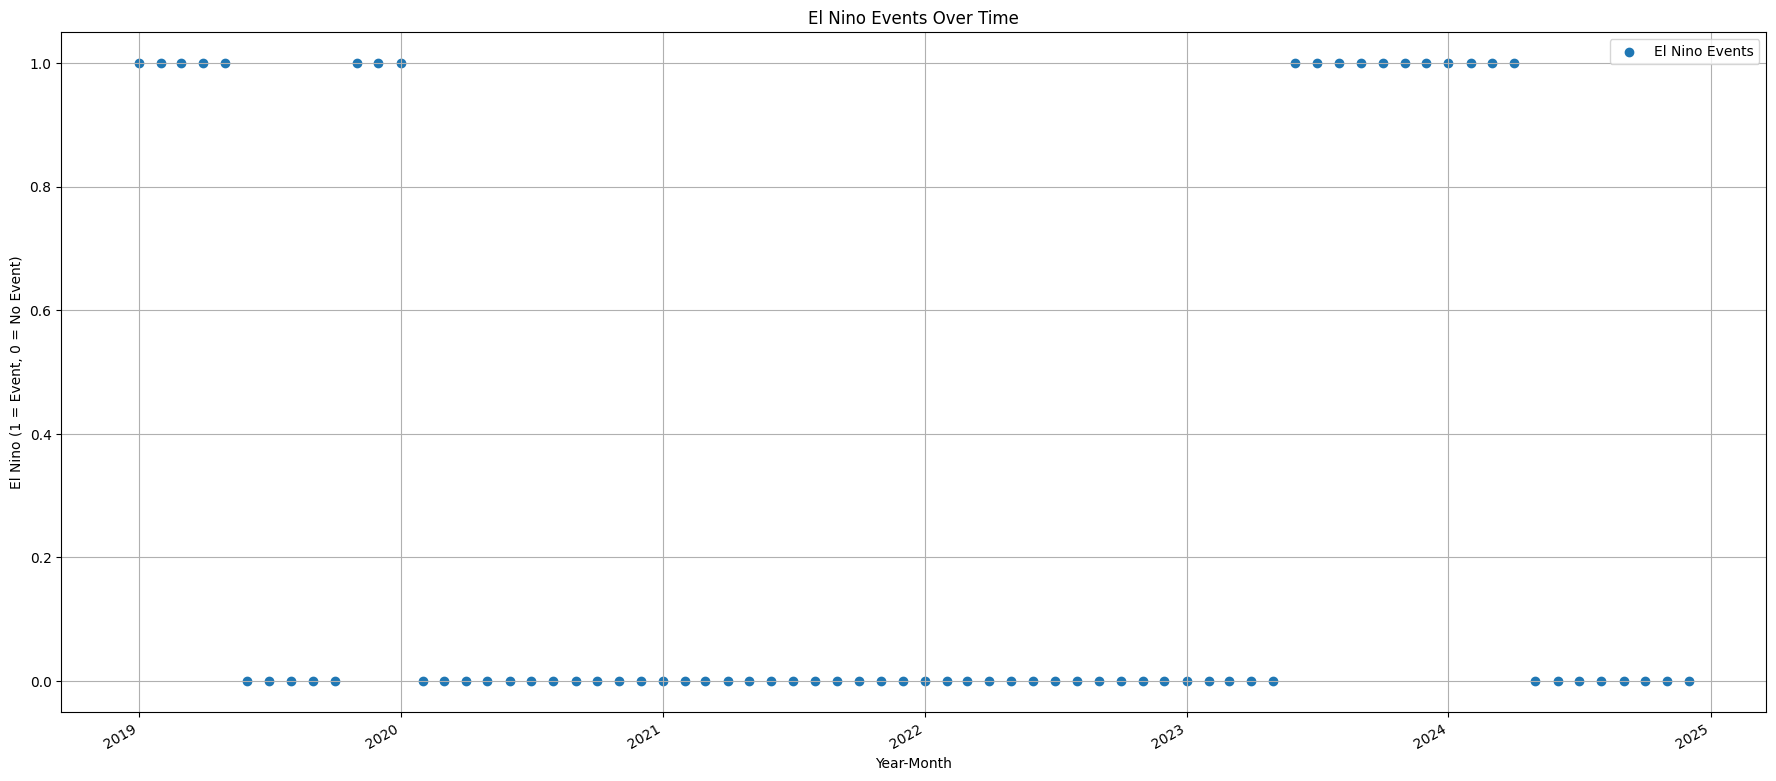

In [ ]:
import matplotlib.dates as mdates
# Create a graph identifying the periods of El Nino

# Create the scatter plot
plt.figure(figsize=(22, 10))
plt.scatter(WL_ONI_14_24['Year_Month'], WL_ONI_14_24['El-Nino'], label='El Nino Events')
plt.title('El Nino Events Over Time')
plt.xlabel('Year-Month')
plt.ylabel('El Nino (1 = Event, 0 = No Event)')
plt.legend()
plt.grid(True)

# Format x-axis to show all years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.show()

# **Linear relationship between variables**

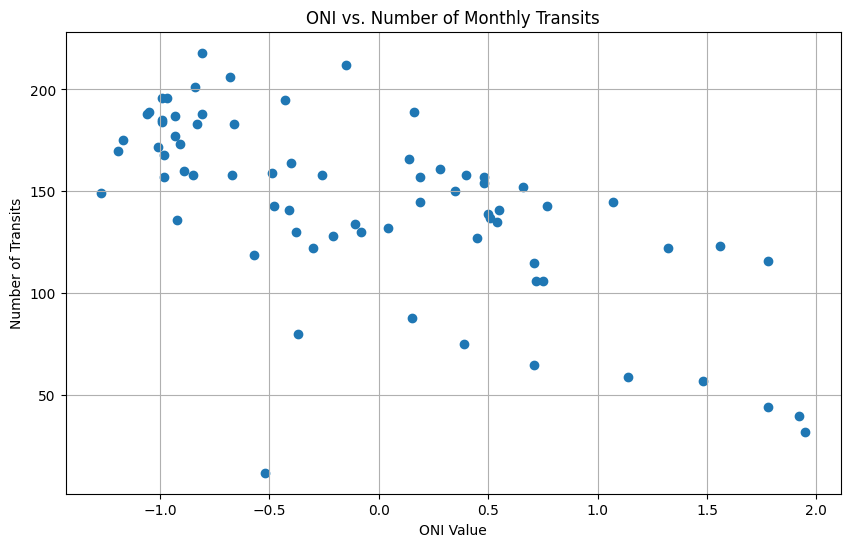

In [ ]:
# Scatter plot ONI and Number of monthly transits
plt.figure(figsize=(10, 6))
plt.scatter(WL_ONI_19_24_PA['ONI'], WL_ONI_19_24_PA['number_transits'])
plt.title('ONI vs. Number of Monthly Transits')
plt.xlabel('ONI Value')
plt.ylabel('Number of Transits')
plt.grid(True)
plt.show()

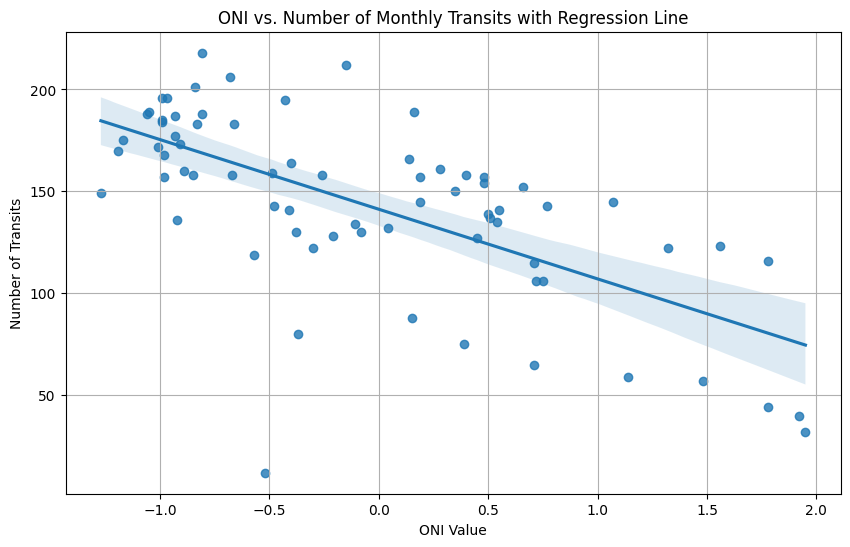

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='ONI', y='number_transits', data=WL_ONI_19_24_PA)
plt.title('ONI vs. Number of Monthly Transits with Regression Line')
plt.xlabel('ONI Value')
plt.ylabel('Number of Transits')
plt.grid(True)
plt.show()

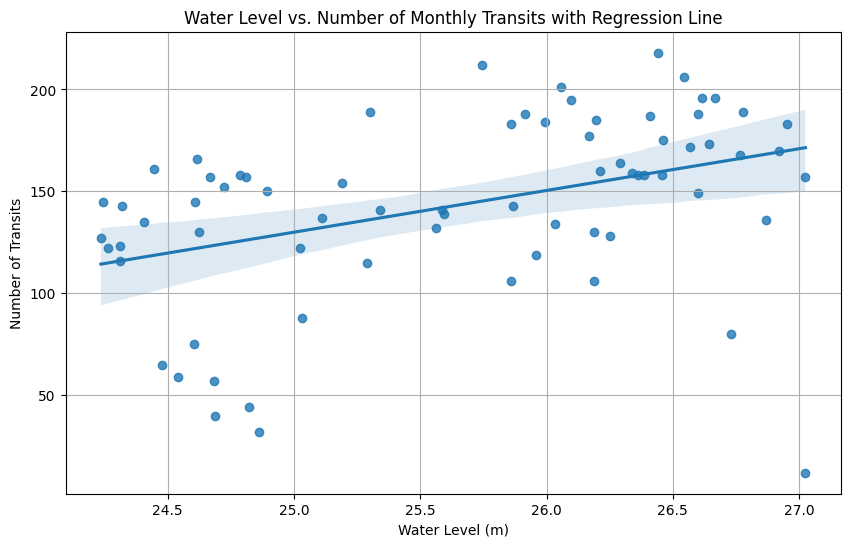

In [ ]:
# Scatter plot with regression line for Water Level and Number of Transits
plt.figure(figsize=(10, 6))
sns.regplot(x='Water_Level_m', y='number_transits', data=WL_ONI_19_24_PA)
plt.title('Water Level vs. Number of Monthly Transits with Regression Line')
plt.xlabel('Water Level (m)')
plt.ylabel('Number of Transits')
plt.grid(True)
plt.show()

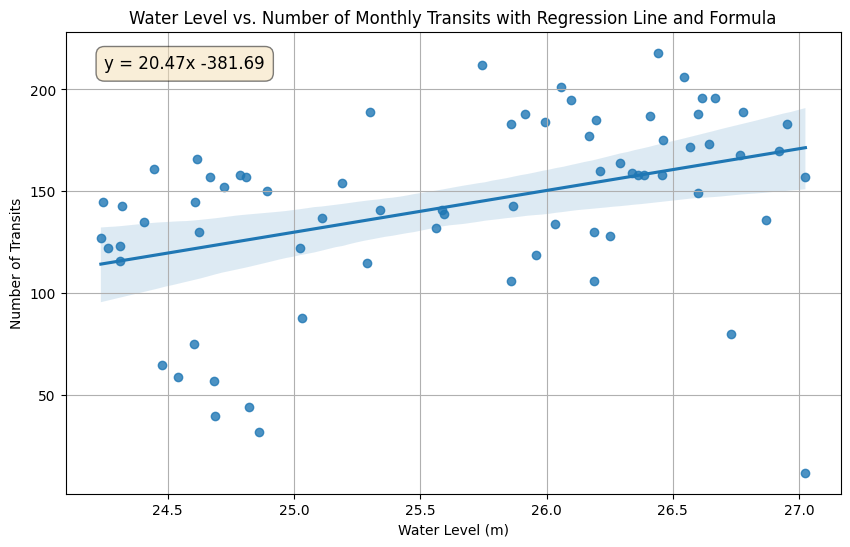

In [ ]:
# Scatter plot with regression line for Water Level and Number of Transits
plt.figure(figsize=(10, 6))
sns.regplot(x='Water_Level_m', y='number_transits', data=WL_ONI_19_24_PA)

# Calculate the slope and intercept
slope, intercept = np.polyfit(WL_ONI_19_24_PA['Water_Level_m'], WL_ONI_19_24_PA['number_transits'], 1)

# Create the formula string
formula = f'y = {slope:.2f}x {intercept:.2f}'

# Add the formula to the plot
# You may need to adjust the coordinates (x, y) to position the text appropriately
plt.text(0.05, 0.95, formula, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.title('Water Level vs. Number of Monthly Transits with Regression Line and Formula')
plt.xlabel('Water Level (m)')
plt.ylabel('Number of Transits')
plt.grid(True)
plt.show()

#Distribution of monthly transits

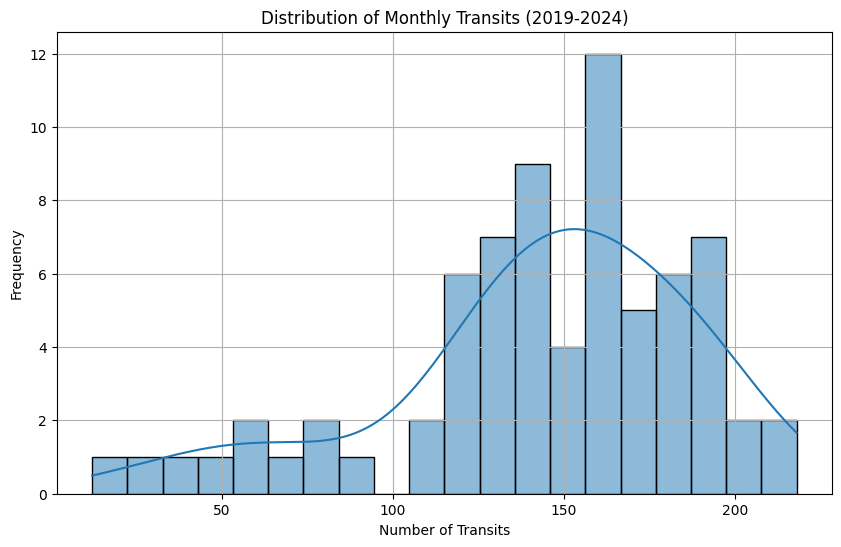

In [ ]:
# Distribution of monthly trnasits histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=WL_ONI_19_24_PA, x='number_transits', bins=20, edgecolor='black', kde=True) # Use seaborn.histplot with kde=True

plt.title('Distribution of Monthly Transits (2019-2024)')
plt.xlabel('Number of Transits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()